# 인턴 1차 과제

#  

 1.기본적인 conncet 과정
 
 2.국내 매출 데이터 전처리 과정 
 
 3.네이버 검색량 데이터
 
 4.연령별 구매내역
 
 5.루시 데이터 전처리

## 기본적인 connect 과정

In [70]:
pip install psycopg2

SyntaxError: invalid syntax (<ipython-input-70-76c1d690d9ab>, line 1)

In [72]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [73]:
import time
import pandas as pd
import psycopg2
import datetime
from tqdm import trange

In [610]:
# DB 연결 부분
uswer = 'dt.intern'
host = '10.80.0.234'
port = '5439'
dbname = 'fnf'
con = psycopg2.connect(dbname='fnf',host='10.80.0.234', port='5439', user = 'dt.intern', password='DTintn0926')
cur = con.cursor()


## 국내 매출 데이터 전처리 과정

In [130]:
start = time.time()

sql = "SELECT sales.saledate,sales.amt_act,sales.qty FROM ax.vw_d_shop shop JOIN ax.mvw_f_sales sales ON shop.shopkey = sales.shopkey WHERE shop.country_nm='한국' AND sales.brand = 'X' AND sales.saledate BETWEEN To_date('2018-01-01', 'YYYY-MM-DD') AND To_date('2019-12-31', 'YYYY-MM-DD') ;"
cur.execute(sql)
result = cur.fetchall()

sales_df = pd.DataFrame(result)
sales_df

print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간
print(sales_df)

time : 155.76600551605225
                  0          1  2
0        2018-04-21  107460.00  1
1        2018-08-15   42340.00  1
2        2018-05-07   45000.00  1
3        2018-09-26   59400.00  1
4        2018-06-06   80300.00  1
...             ...        ... ..
6371260  2019-09-26  -79000.00 -1
6371261  2018-07-17   50000.00  1
6371262  2018-09-17  -39500.00 -1
6371263  2018-05-04   41400.00  1
6371264  2018-11-23  325000.00  1

[6371265 rows x 3 columns]


In [131]:
# 컬럼 수정
sales_df.columns = ['sale_date', 'amt_act','qty']
sales_df

,sale_date,amt_act,qty
0,2018-04-21,107460.00,1
1,2018-08-15,42340.00,1
2,2018-05-07,45000.00,1
3,2018-09-26,59400.00,1
4,2018-06-06,80300.00,1
...,...,...,...
6371260,2019-09-26,-79000.00,-1
6371261,2018-07-17,50000.00,1
6371262,2018-09-17,-39500.00,-1
6371263,2018-05-04,41400.00,1


In [132]:
# 날짜 변환
sales_df['sale_date'] = pd.to_datetime(sales_df['sale_date'], format='%Y-%m-%d %H:%M:%S', errors='raise')
sales_df

,sale_date,amt_act,qty
0,2018-04-21,107460.00,1
1,2018-08-15,42340.00,1
2,2018-05-07,45000.00,1
3,2018-09-26,59400.00,1
4,2018-06-06,80300.00,1
...,...,...,...
6371260,2019-09-26,-79000.00,-1
6371261,2018-07-17,50000.00,1
6371262,2018-09-17,-39500.00,-1
6371263,2018-05-04,41400.00,1


In [140]:
# 일자별 매출 데이터
aa= sales_df.groupby(sales_df['sale_date'])['qty'].sum()
aa

sale_date
2018-01-01     2807
2018-01-02     7061
2018-01-03     4059
2018-01-04     3610
2018-01-05     4341
              ...  
2019-12-27     7688
2019-12-28    11016
2019-12-29    10875
2019-12-30     6930
2019-12-31     7346
Name: qty, Length: 730, dtype: int64

In [142]:
# 일자별 매출 데이터
sales_amt_df = sales_df[['sale_date','amt_act']].groupby(sales_df['sale_date']).sum()

# 일자별 수량 데이터
sales_qty_df = sales_df[['sale_date','qty']].groupby(sales_df['sale_date']).sum()


,qty
sale_date,
2018-01-01,2807
2018-01-02,7061
2018-01-03,4059
2018-01-04,3610
2018-01-05,4341
...,...
2019-12-27,7688
2019-12-28,11016
2019-12-29,10875


In [144]:
sales_amt_df = sales_amt_df.reset_index().rename(columns={"index": "sale_date"})
sales_qty_df = sales_qty_df.reset_index().rename(columns={"index": "sale_date"})

In [145]:
# for i in range(0,len(sales_df)):
week_list=[]
year_list=[]
for i in trange(0,len(sales_day_df)):
    n = datetime.datetime(sales_amt_df['sale_date'].dt.year[i], sales_amt_df['sale_date'].dt.month[i], sales_amt_df['sale_date'].dt.day[i])
    print(n)
    week_list.append(n.isocalendar()[1])
    year_list.append(n.isocalendar()[0])


 13%|██████████▍                                                                     | 95/730 [00:00<00:00, 942.93it/s]

2018-01-01 00:00:00
2018-01-02 00:00:00
2018-01-03 00:00:00
2018-01-04 00:00:00
2018-01-05 00:00:00
2018-01-06 00:00:00
2018-01-07 00:00:00
2018-01-08 00:00:00
2018-01-09 00:00:00
2018-01-10 00:00:00
2018-01-11 00:00:00
2018-01-12 00:00:00
2018-01-13 00:00:00
2018-01-14 00:00:00
2018-01-15 00:00:00
2018-01-16 00:00:00
2018-01-17 00:00:00
2018-01-18 00:00:00
2018-01-19 00:00:00
2018-01-20 00:00:00
2018-01-21 00:00:00
2018-01-22 00:00:00
2018-01-23 00:00:00
2018-01-24 00:00:00
2018-01-25 00:00:00
2018-01-26 00:00:00
2018-01-27 00:00:00
2018-01-28 00:00:00
2018-01-29 00:00:00
2018-01-30 00:00:00
2018-01-31 00:00:00
2018-02-01 00:00:00
2018-02-02 00:00:00
2018-02-03 00:00:00
2018-02-04 00:00:00
2018-02-05 00:00:00
2018-02-06 00:00:00
2018-02-07 00:00:00
2018-02-08 00:00:00
2018-02-09 00:00:00
2018-02-10 00:00:00
2018-02-11 00:00:00
2018-02-12 00:00:00
2018-02-13 00:00:00
2018-02-14 00:00:00
2018-02-15 00:00:00
2018-02-16 00:00:00
2018-02-17 00:00:00
2018-02-18 00:00:00
2018-02-19 00:00:00


 39%|██████████████████████████████▋                                                | 283/730 [00:00<00:00, 938.49it/s]

2018-06-25 00:00:00
2018-06-26 00:00:00
2018-06-27 00:00:00
2018-06-28 00:00:00
2018-06-29 00:00:00
2018-06-30 00:00:00
2018-07-01 00:00:00
2018-07-02 00:00:00
2018-07-03 00:00:00
2018-07-04 00:00:00
2018-07-05 00:00:00
2018-07-06 00:00:00
2018-07-07 00:00:00
2018-07-08 00:00:00
2018-07-09 00:00:00
2018-07-10 00:00:00
2018-07-11 00:00:00
2018-07-12 00:00:00
2018-07-13 00:00:00
2018-07-14 00:00:00
2018-07-15 00:00:00
2018-07-16 00:00:00
2018-07-17 00:00:00
2018-07-18 00:00:00
2018-07-19 00:00:00
2018-07-20 00:00:00
2018-07-21 00:00:00
2018-07-22 00:00:00
2018-07-23 00:00:00
2018-07-24 00:00:00
2018-07-25 00:00:00
2018-07-26 00:00:00
2018-07-27 00:00:00
2018-07-28 00:00:00
2018-07-29 00:00:00
2018-07-30 00:00:00
2018-07-31 00:00:00
2018-08-01 00:00:00
2018-08-02 00:00:00
2018-08-03 00:00:00
2018-08-04 00:00:00
2018-08-05 00:00:00
2018-08-06 00:00:00
2018-08-07 00:00:00
2018-08-08 00:00:00
2018-08-09 00:00:00
2018-08-10 00:00:00
2018-08-11 00:00:00
2018-08-12 00:00:00
2018-08-13 00:00:00


 66%|████████████████████████████████████████████████████▍                          | 484/730 [00:00<00:00, 968.98it/s]

2018-12-16 00:00:00
2018-12-17 00:00:00
2018-12-18 00:00:00
2018-12-19 00:00:00
2018-12-20 00:00:00
2018-12-21 00:00:00
2018-12-22 00:00:00
2018-12-23 00:00:00
2018-12-24 00:00:00
2018-12-25 00:00:00
2018-12-26 00:00:00
2018-12-27 00:00:00
2018-12-28 00:00:00
2018-12-29 00:00:00
2018-12-30 00:00:00
2018-12-31 00:00:00
2019-01-01 00:00:00
2019-01-02 00:00:00
2019-01-03 00:00:00
2019-01-04 00:00:00
2019-01-05 00:00:00
2019-01-06 00:00:00
2019-01-07 00:00:00
2019-01-08 00:00:00
2019-01-09 00:00:00
2019-01-10 00:00:00
2019-01-11 00:00:00
2019-01-12 00:00:00
2019-01-13 00:00:00
2019-01-14 00:00:00
2019-01-15 00:00:00
2019-01-16 00:00:00
2019-01-17 00:00:00
2019-01-18 00:00:00
2019-01-19 00:00:00
2019-01-20 00:00:00
2019-01-21 00:00:00
2019-01-22 00:00:00
2019-01-23 00:00:00
2019-01-24 00:00:00
2019-01-25 00:00:00
2019-01-26 00:00:00
2019-01-27 00:00:00
2019-01-28 00:00:00
2019-01-29 00:00:00
2019-01-30 00:00:00
2019-01-31 00:00:00
2019-02-01 00:00:00
2019-02-02 00:00:00
2019-02-03 00:00:00


 93%|█████████████████████████████████████████████████████████████████████████▎     | 678/730 [00:00<00:00, 955.75it/s]

2019-06-27 00:00:00
2019-06-28 00:00:00
2019-06-29 00:00:00
2019-06-30 00:00:00
2019-07-01 00:00:00
2019-07-02 00:00:00
2019-07-03 00:00:00
2019-07-04 00:00:00
2019-07-05 00:00:00
2019-07-06 00:00:00
2019-07-07 00:00:00
2019-07-08 00:00:00
2019-07-09 00:00:00
2019-07-10 00:00:00
2019-07-11 00:00:00
2019-07-12 00:00:00
2019-07-13 00:00:00
2019-07-14 00:00:00
2019-07-15 00:00:00
2019-07-16 00:00:00
2019-07-17 00:00:00
2019-07-18 00:00:00
2019-07-19 00:00:00
2019-07-20 00:00:00
2019-07-21 00:00:00
2019-07-22 00:00:00
2019-07-23 00:00:00
2019-07-24 00:00:00
2019-07-25 00:00:00
2019-07-26 00:00:00
2019-07-27 00:00:00
2019-07-28 00:00:00
2019-07-29 00:00:00
2019-07-30 00:00:00
2019-07-31 00:00:00
2019-08-01 00:00:00
2019-08-02 00:00:00
2019-08-03 00:00:00
2019-08-04 00:00:00
2019-08-05 00:00:00
2019-08-06 00:00:00
2019-08-07 00:00:00
2019-08-08 00:00:00
2019-08-09 00:00:00
2019-08-10 00:00:00
2019-08-11 00:00:00
2019-08-12 00:00:00
2019-08-13 00:00:00
2019-08-14 00:00:00
2019-08-15 00:00:00


100%|███████████████████████████████████████████████████████████████████████████████| 730/730 [00:00<00:00, 974.52it/s]

2019-12-25 00:00:00
2019-12-26 00:00:00
2019-12-27 00:00:00
2019-12-28 00:00:00
2019-12-29 00:00:00
2019-12-30 00:00:00
2019-12-31 00:00:00


In [146]:
sale_week_df = pd.DataFrame(week_list, columns=['week'])
sale_year_df = pd.DataFrame(year_list, columns=['year'])

print(sale_week_df)
print(sale_year_df)

     week
0       1
1       1
2       1
3       1
4       1
..    ...
725    52
726    52
727    52
728     1
729     1

[730 rows x 1 columns]
     year
0    2018
1    2018
2    2018
3    2018
4    2018
..    ...
725  2019
726  2019
727  2019
728  2020
729  2020

[730 rows x 1 columns]


In [168]:
sales_day = pd.concat([sales_amt_df,sales_qty_df['qty'],sale_year_df,sale_week_df],axis=1)

In [496]:
sales_day

,sale_date,amt_act,qty,year,week
0,2018-01-01,532830290.00,2807,2018,1
1,2018-01-02,1405076266.00,7061,2018,1
2,2018-01-03,799774369.00,4059,2018,1
3,2018-01-04,693994490.00,3610,2018,1
4,2018-01-05,884157885.00,4341,2018,1
...,...,...,...,...,...
725,2019-12-27,1091418275.00,7688,2019,52
726,2019-12-28,1580183400.00,11016,2019,52
727,2019-12-29,1590112310.00,10875,2019,52
728,2019-12-30,1016938820.00,6930,2020,1


In [170]:
# csv 생성
sales_day.to_csv("./total_sales_date.csv")

In [507]:
# 주별 매출 데이터
sales_week_amt_2018 = sales_day[sales_day['year']==2018][['week','amt_act']].groupby(sales_day['week'])['amt_act'].sum()
sales_week_amt_2019 = sales_day[sales_day['year']==2019][['week','amt_act']].groupby(sales_day['week'])['amt_act'].sum()

# 주별 수량 데이터
sales_week_qty_2018 = sales_day[sales_day['year']==2018][['week','qty']].groupby(sales_day['week'])['qty'].sum()
sales_week_qty_2019 = sales_day[sales_day['year']==2019][['week','qty']].groupby(sales_day['week'])['qty'].sum()


In [510]:
sales_week_amt_2018.to_csv("./total_sales_amt_week_2018.csv")
sales_week_amt_2019.to_csv("./total_sales_amt_week_2019.csv")

sales_week_qty_2018.to_csv("./total_sales_qty_week_2018.csv")
sales_week_qty_2019.to_csv("./total_sales_qty_week_2019.csv")

In [506]:
sales_day[sales_day['year']==2018]

,sale_date,amt_act,qty,year,week
0,2018-01-01,532830290.00,2807,2018,1
1,2018-01-02,1405076266.00,7061,2018,1
2,2018-01-03,799774369.00,4059,2018,1
3,2018-01-04,693994490.00,3610,2018,1
4,2018-01-05,884157885.00,4341,2018,1
...,...,...,...,...,...
359,2018-12-26,1156085520.00,5136,2018,52
360,2018-12-27,1071247280.00,5090,2018,52
361,2018-12-28,1209484236.00,5350,2018,52
362,2018-12-29,2242192255.00,10289,2018,52


## 네이버 검색량 데이터

In [119]:
start = time.time()

sql2 = "SELECT srch_dt, dvc, srch_cnt FROM spectrum.nvr_srch_csv nsc WHERE kwd LIKE '%디스커버리%' AND srch_dt BETWEEN To_date('2018-01-01', 'YYYY-MM-DD') AND To_date('2019-12-31', 'YYYY-MM-DD');"
cur.execute(sql2)
result2 = cur.fetchall()

naver_search_df = pd.DataFrame(result2)
naver_search_df

print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간
print(naver_search_df)

time : 5.12613582611084
                0   1      2
0      2018-01-09  pc   5.00
1      2018-01-24  pc   6.00
2      2018-01-28  pc   9.00
3      2018-01-29  pc   5.00
4      2018-01-31  pc   5.00
...           ...  ..    ...
98416  2019-12-27  mo  61.40
98417  2019-12-28  mo  63.40
98418  2019-12-29  mo  60.40
98419  2019-12-30  mo  57.40
98420  2019-12-31  mo  31.20

[98421 rows x 3 columns]


In [120]:
# 컬럼 수정
naver_search_df.columns = ['srch_dt', 'dvc', 'srch_cnt']
naver_search_df

,srch_dt,dvc,srch_cnt
0,2018-01-09,pc,5.00
1,2018-01-24,pc,6.00
2,2018-01-28,pc,9.00
3,2018-01-29,pc,5.00
4,2018-01-31,pc,5.00
...,...,...,...
98416,2019-12-27,mo,61.40
98417,2019-12-28,mo,63.40
98418,2019-12-29,mo,60.40
98419,2019-12-30,mo,57.40


In [121]:
# 날짜 변환
naver_search_df['srch_dt'] = pd.to_datetime(naver_search_df['srch_dt'], format='%Y-%m-%d %H:%M:%S', errors='raise')
naver_search_df

,srch_dt,dvc,srch_cnt
0,2018-01-09,pc,5.00
1,2018-01-24,pc,6.00
2,2018-01-28,pc,9.00
3,2018-01-29,pc,5.00
4,2018-01-31,pc,5.00
...,...,...,...
98416,2019-12-27,mo,61.40
98417,2019-12-28,mo,63.40
98418,2019-12-29,mo,60.40
98419,2019-12-30,mo,57.40


In [122]:
# 일자별 검색 데이터
naver_day_df = naver_search_df[['srch_dt','srch_cnt']].groupby(naver_search_df['srch_dt']).sum()
naver_day_df

,srch_cnt
srch_dt,
2018-01-01,34827.80
2018-01-02,31071.50
2018-01-03,30326.60
2018-01-04,28873.50
2018-01-05,26287.30
...,...
2019-12-27,39975.00
2019-12-28,44044.70
2019-12-29,49249.00


In [124]:
naver_day_df = naver_day_df.reset_index().rename(columns={"index": "srch_dt"})

# for i in range(0,len(sales_df)):
week_list=[]
year_list=[]
for i in trange(0,len(naver_day_df)):
    n = datetime.datetime(naver_day_df['srch_dt'].dt.year[i], naver_day_df['srch_dt'].dt.month[i], naver_day_df['srch_dt'].dt.day[i])
    week_list.append(n.isocalendar()[1])
    year_list.append(n.isocalendar()[0])


naver_week_df = pd.DataFrame(week_list, columns=['week'])
naver_year_df = pd.DataFrame(year_list, columns=['year'])

print(naver_week_df)
print(naver_year_df)


naver_day = pd.concat([naver_day_df,naver_year_df,naver_week_df],axis=1)
naver_day

 15%|███████████▋                                                                  | 109/730 [00:00<00:00, 1086.39it/s]

2018-01-01 00:00:00
2018-01-02 00:00:00
2018-01-03 00:00:00
2018-01-04 00:00:00
2018-01-05 00:00:00
2018-01-06 00:00:00
2018-01-07 00:00:00
2018-01-08 00:00:00
2018-01-09 00:00:00
2018-01-10 00:00:00
2018-01-11 00:00:00
2018-01-12 00:00:00
2018-01-13 00:00:00
2018-01-14 00:00:00
2018-01-15 00:00:00
2018-01-16 00:00:00
2018-01-17 00:00:00
2018-01-18 00:00:00
2018-01-19 00:00:00
2018-01-20 00:00:00
2018-01-21 00:00:00
2018-01-22 00:00:00
2018-01-23 00:00:00
2018-01-24 00:00:00
2018-01-25 00:00:00
2018-01-26 00:00:00
2018-01-27 00:00:00
2018-01-28 00:00:00
2018-01-29 00:00:00
2018-01-30 00:00:00
2018-01-31 00:00:00
2018-02-01 00:00:00
2018-02-02 00:00:00
2018-02-03 00:00:00
2018-02-04 00:00:00
2018-02-05 00:00:00
2018-02-06 00:00:00
2018-02-07 00:00:00
2018-02-08 00:00:00
2018-02-09 00:00:00
2018-02-10 00:00:00
2018-02-11 00:00:00
2018-02-12 00:00:00
2018-02-13 00:00:00
2018-02-14 00:00:00
2018-02-15 00:00:00
2018-02-16 00:00:00
2018-02-17 00:00:00
2018-02-18 00:00:00
2018-02-19 00:00:00


 45%|███████████████████████████████████▎                                          | 331/730 [00:00<00:00, 1096.01it/s]


2018-07-21 00:00:00
2018-07-22 00:00:00
2018-07-23 00:00:00
2018-07-24 00:00:00
2018-07-25 00:00:00
2018-07-26 00:00:00
2018-07-27 00:00:00
2018-07-28 00:00:00
2018-07-29 00:00:00
2018-07-30 00:00:00
2018-07-31 00:00:00
2018-08-01 00:00:00
2018-08-02 00:00:00
2018-08-03 00:00:00
2018-08-04 00:00:00
2018-08-05 00:00:00
2018-08-06 00:00:00
2018-08-07 00:00:00
2018-08-08 00:00:00
2018-08-09 00:00:00
2018-08-10 00:00:00
2018-08-11 00:00:00
2018-08-12 00:00:00
2018-08-13 00:00:00
2018-08-14 00:00:00
2018-08-15 00:00:00
2018-08-16 00:00:00
2018-08-17 00:00:00
2018-08-18 00:00:00
2018-08-19 00:00:00
2018-08-20 00:00:00
2018-08-21 00:00:00
2018-08-22 00:00:00
2018-08-23 00:00:00
2018-08-24 00:00:00
2018-08-25 00:00:00
2018-08-26 00:00:00
2018-08-27 00:00:00
2018-08-28 00:00:00
2018-08-29 00:00:00
2018-08-30 00:00:00
2018-08-31 00:00:00
2018-09-01 00:00:00
2018-09-02 00:00:00
2018-09-03 00:00:00
2018-09-04 00:00:00
2018-09-05 00:00:00
2018-09-06 00:00:00
2018-09-07 00:00:00
2018-09-08 00:00:00

 72%|████████████████████████████████████████████████████████▌                     | 529/730 [00:00<00:00, 1034.89it/s]


2019-02-09 00:00:00
2019-02-10 00:00:00
2019-02-11 00:00:00
2019-02-12 00:00:00
2019-02-13 00:00:00
2019-02-14 00:00:00
2019-02-15 00:00:00
2019-02-16 00:00:00
2019-02-17 00:00:00
2019-02-18 00:00:00
2019-02-19 00:00:00
2019-02-20 00:00:00
2019-02-21 00:00:00
2019-02-22 00:00:00
2019-02-23 00:00:00
2019-02-24 00:00:00
2019-02-25 00:00:00
2019-02-26 00:00:00
2019-02-27 00:00:00
2019-02-28 00:00:00
2019-03-01 00:00:00
2019-03-02 00:00:00
2019-03-03 00:00:00
2019-03-04 00:00:00
2019-03-05 00:00:00
2019-03-06 00:00:00
2019-03-07 00:00:00
2019-03-08 00:00:00
2019-03-09 00:00:00
2019-03-10 00:00:00
2019-03-11 00:00:00
2019-03-12 00:00:00
2019-03-13 00:00:00
2019-03-14 00:00:00
2019-03-15 00:00:00
2019-03-16 00:00:00
2019-03-17 00:00:00
2019-03-18 00:00:00
2019-03-19 00:00:00
2019-03-20 00:00:00
2019-03-21 00:00:00
2019-03-22 00:00:00
2019-03-23 00:00:00
2019-03-24 00:00:00
2019-03-25 00:00:00
2019-03-26 00:00:00
2019-03-27 00:00:00
2019-03-28 00:00:00
2019-03-29 00:00:00
2019-03-30 00:00:00

100%|██████████████████████████████████████████████████████████████████████████████| 730/730 [00:00<00:00, 1069.88it/s]



2019-08-19 00:00:00
2019-08-20 00:00:00
2019-08-21 00:00:00
2019-08-22 00:00:00
2019-08-23 00:00:00
2019-08-24 00:00:00
2019-08-25 00:00:00
2019-08-26 00:00:00
2019-08-27 00:00:00
2019-08-28 00:00:00
2019-08-29 00:00:00
2019-08-30 00:00:00
2019-08-31 00:00:00
2019-09-01 00:00:00
2019-09-02 00:00:00
2019-09-03 00:00:00
2019-09-04 00:00:00
2019-09-05 00:00:00
2019-09-06 00:00:00
2019-09-07 00:00:00
2019-09-08 00:00:00
2019-09-09 00:00:00
2019-09-10 00:00:00
2019-09-11 00:00:00
2019-09-12 00:00:00
2019-09-13 00:00:00
2019-09-14 00:00:00
2019-09-15 00:00:00
2019-09-16 00:00:00
2019-09-17 00:00:00
2019-09-18 00:00:00
2019-09-19 00:00:00
2019-09-20 00:00:00
2019-09-21 00:00:00
2019-09-22 00:00:00
2019-09-23 00:00:00
2019-09-24 00:00:00
2019-09-25 00:00:00
2019-09-26 00:00:00
2019-09-27 00:00:00
2019-09-28 00:00:00
2019-09-29 00:00:00
2019-09-30 00:00:00
2019-10-01 00:00:00
2019-10-02 00:00:00
2019-10-03 00:00:00
2019-10-04 00:00:00
2019-10-05 00:00:00
2019-10-06 00:00:00
2019-10-07 00:00:00

,srch_dt,srch_cnt,year,week
0,2018-01-01,34827.80,2018,1
1,2018-01-02,31071.50,2018,1
2,2018-01-03,30326.60,2018,1
3,2018-01-04,28873.50,2018,1
4,2018-01-05,26287.30,2018,1
...,...,...,...,...
725,2019-12-27,39975.00,2019,52
726,2019-12-28,44044.70,2019,52
727,2019-12-29,49249.00,2019,52
728,2019-12-30,40087.80,2020,1


In [126]:
naver_day

,srch_dt,srch_cnt,year,week
0,2018-01-01,34827.80,2018,1
1,2018-01-02,31071.50,2018,1
2,2018-01-03,30326.60,2018,1
3,2018-01-04,28873.50,2018,1
4,2018-01-05,26287.30,2018,1
...,...,...,...,...
725,2019-12-27,39975.00,2019,52
726,2019-12-28,44044.70,2019,52
727,2019-12-29,49249.00,2019,52
728,2019-12-30,40087.80,2020,1


In [127]:
# csv 생성
naver_day.to_csv("./naver_day.csv")

In [512]:
# 주별 매출 데이터
naver_week_2018 = naver_day[naver_day['year']==2018][['week','srch_cnt']].groupby(naver_day['week'])['srch_cnt'].sum()

# 주별 수량 데이터
naver_week_2019 = naver_day[naver_day['year']==2019][['week','srch_cnt']].groupby(naver_day['week'])['srch_cnt'].sum()
naver_week_2018.to_csv("./naver_week_2018.csv")
naver_week_2019.to_csv("./naver_week_2019.csv")

## 연령별/성별 구매 내역

In [175]:
start = time.time()

sql3 = "SELECT sales.saledate, vdcm.gender ,vdcm.birth_day ,vdcm.join_date ,vdcm.last_log_date,vdcm.sleep_yn,vdcm.cid, sales.scskey,sales.amt_act,sales.qty  FROM ax.vw_d_shop shop JOIN ax.mvw_f_sales sales ON shop.shopkey = sales.shopkey JOIN ax.vw_d_cust_member vdcm ON sales.cid = vdcm.cid WHERE shop.country_nm='한국' AND sales.brand = 'X' AND sales.saledate BETWEEN To_date('2019-01-01', 'YYYY-MM-DD') AND To_date('2020-12-31', 'YYYY-MM-DD') AND vdcm .birth_day IS NOT NULL AND vdcm.gender IS NOT NULL ;"
cur.execute(sql3)
result3 = cur.fetchall()

cust_df = pd.DataFrame(result3)
cust_df

print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간
print(cust_df)

time : 222.92803740501404
                  0  1           2           3                   4  5  \
0        2020-02-11  F  1977-10-18  2003-01-18                 NaT  N   
1        2020-06-10  F  1975-04-26  2003-10-25                 NaT  N   
2        2020-06-10  F  1975-04-26  2003-10-25                 NaT  N   
3        2020-06-10  F  1975-04-26  2003-10-25                 NaT  N   
4        2020-06-10  F  1975-04-26  2003-10-25                 NaT  N   
...             ... ..         ...         ...                 ... ..   
2206086  2020-12-31  F  1977-12-02  2020-12-31                 NaT  N   
2206087  2020-12-31  F  1971-12-19  2020-12-31 2020-12-31 21:31:16  N   
2206088  2020-12-31  F  1970-12-17  2020-12-31 2020-12-31 21:51:08  N   
2206089  2020-02-04  F  1977-10-07  2013-04-11 2021-03-16 15:53:22  N   
2206090  2019-10-30  F  1977-10-07  2013-04-11 2021-03-16 15:53:22  N   

                6                   7          8  9  
0        B0024806  X20SDXSHF6031WH270  1090

In [176]:
# 컬럼 수정
cust_df.columns = ['saledate','gender' ,'birth_day' ,'join_date' ,'last_log_date','sleep_yn','cid', 'scskey','amt_act','qty']
cust_df

,saledate,gender,birth_day,join_date,last_log_date,sleep_yn,cid,scskey,amt_act,qty
0,2020-02-11,F,1977-10-18,2003-01-18,NaT,N,B0024806,X20SDXSHF6031WH270,109000.00,1
1,2020-06-10,F,1975-04-26,2003-10-25,NaT,N,B0039196,X20SDKRS58031DG120,49000.00,1
2,2020-06-10,F,1975-04-26,2003-10-25,NaT,N,B0039196,X20SDKSP51031DG140,59000.00,1
3,2020-06-10,F,1975-04-26,2003-10-25,NaT,N,B0039196,X20SDKTP53031MG140,49000.00,1
4,2020-06-10,F,1975-04-26,2003-10-25,NaT,N,B0039196,X20SDKRS59031BK120,45000.00,1
...,...,...,...,...,...,...,...,...,...,...
2206086,2020-12-31,F,1977-12-02,2020-12-31,NaT,N,X8909781,X20FDWDJ68061BK90,369000.00,1
2206087,2020-12-31,F,1971-12-19,2020-12-31,2020-12-31 21:31:16,N,X8909825,X20FDWDJ7X061BK95,294000.00,1
2206088,2020-12-31,F,1970-12-17,2020-12-31,2020-12-31 21:51:08,N,X8909834,X19FDMDJ7E961BK95,186000.00,1
2206089,2020-02-04,F,1977-10-07,2013-04-11,2021-03-16 15:53:22,N,X9546414,X20SDXBK31011ZBF,132000.00,1


## 성별

In [267]:
# 성별 구매금액 / 구매량
cust_df_sex_act = cust_df[['saledate','gender','amt_act']]
cust_df_sex_qty = cust_df[['saledate','gender','qty']]

In [268]:
# 날짜 변환
cust_df_sex_act['saledate'] = pd.to_datetime(cust_df_sex_act['saledate'], format='%Y-%m-%d %H:%M:%S', errors='raise')
cust_df_sex_qty['saledate'] = pd.to_datetime(cust_df_sex_qty['saledate'], format='%Y-%m-%d %H:%M:%S', errors='raise')


<ipython-input-268-ff863b212434>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_df_sex_act['saledate'] = pd.to_datetime(cust_df_sex_act['saledate'], format='%Y-%m-%d %H:%M:%S', errors='raise')
<ipython-input-268-ff863b212434>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_df_sex_qty['saledate'] = pd.to_datetime(cust_df_sex_qty['saledate'], format='%Y-%m-%d %H:%M:%S', errors='raise')


In [277]:
from dateutil.relativedelta import relativedelta
rd=relativedelta(months=1)
data1 = datetime.date(2019,1,1)
data2 = datetime.date(2019,1,31)

w_qty_list = []
w_act_list = []
m_qty_list = []
m_act_list = []
count = 1
for i in range(0,12):
    data1 = datetime.date(2019,1,1)
    data2 = datetime.date(2019,1,31)
    rd=relativedelta(months=i)
#     print(str(data1 +rd), str(data2 +rd))
    cust_df1 = cust_df_sex_act[(cust_df_sex_act['saledate'] > str(data1 +rd) ) & (cust_df_sex_act['saledate'] <=  str(data2 +rd))]
    cust_df2 = cust_df_sex_qty[(cust_df_sex_qty['saledate'] > str(data1 +rd) ) & (cust_df_sex_qty['saledate'] <=  str(data2 +rd))]

#     print(cust_df1)
    w_act_list.append( int(cust_df1.groupby(cust_df1['gender']).sum()['amt_act'][0]))
    m_act_list.append( int(cust_df1.groupby(cust_df1['gender']).sum()['amt_act'][1]))
    w_qty_list.append( int(cust_df2.groupby(cust_df2['gender']).sum()['qty'][0]))
    m_qty_list.append( int(cust_df2.groupby(cust_df2['gender']).sum()['qty'][1]))

In [291]:
# w_act_list

total_list = pd.DataFrame({'w_act': w_act_list,
                   'm_act': m_act_list,
                   'w_qty': w_qty_list,
                    'm_qty':m_qty_list},
                  index=['1','2','3','4','5','6','7','8','9','10','11','12'])
total_list

,w_act,m_act,w_qty,m_qty
1,5006327160,3324601735,26916,18537
2,3915309995,2443442530,31172,19531
3,3549922895,2365947475,35368,23430
4,3354497521,2204116325,37906,25394
5,3287582184,2320184314,47670,34053
6,2781061136,2013921395,43776,31320
7,3089423110,2151156260,50929,34672
8,2512054760,1729707845,35154,24363
9,5411932175,3473591953,45556,29760
10,8551639830,5219298492,63328,39612


In [377]:
total_list.to_csv("./sex_sales_date.csv")

## 연령별

In [293]:
# 성별 구매금액 / 구매량
cust_df_age_act = cust_df[['saledate','birth_day','amt_act']]
cust_df_age_qty = cust_df[['saledate','birth_day','qty']]

In [294]:
cust_df_age_act

,saledate,birth_day,amt_act
0,2020-02-11,1977-10-18,109000.00
1,2020-06-10,1975-04-26,49000.00
2,2020-06-10,1975-04-26,59000.00
3,2020-06-10,1975-04-26,49000.00
4,2020-06-10,1975-04-26,45000.00
...,...,...,...
2206086,2020-12-31,1977-12-02,369000.00
2206087,2020-12-31,1971-12-19,294000.00
2206088,2020-12-31,1970-12-17,186000.00
2206089,2020-02-04,1977-10-07,132000.00


In [307]:
def age(df):
    current_year = 2021
    age = current_year - int(df['birth_day'][0:4])
    return age

In [371]:
def gen(df):
    if df['age'] >= 10 and df['age'] < 20:
        gen = 10
    elif df['age'] >= 20 and df['age'] < 30:
        gen = 20
    elif df['age'] >= 30 and df['age'] < 40:
        gen = 30
    elif df['age'] >= 40 and df['age'] < 50:
        gen = 40
    elif df['age'] >= 50 and df['age'] < 60:
        gen = 50
    else:
        gen = 0
    return gen

In [310]:
cust_df_age_act['age'] = cust_df_age_act.apply(age,axis=1)
cust_df_age_qty['age'] = cust_df_age_qty.apply(age,axis=1)

<ipython-input-310-3b9a2efcbea0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_df_age_act['age'] = cust_df_age_act.apply(age,axis=1)


In [372]:
cust_df_age_act['gen'] = cust_df_age_act.apply(gen,axis=1)
cust_df_age_qty['gen'] = cust_df_age_qty.apply(gen,axis=1)

<ipython-input-372-57ec0d192a76>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_df_age_act['gen'] = cust_df_age_act.apply(gen,axis=1)
<ipython-input-372-57ec0d192a76>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_df_age_qty['gen'] = cust_df_age_qty.apply(gen,axis=1)


In [376]:
cust_df_age_qty[cust_df_age_qty['gen'] ==0]

,saledate,birth_day,qty,age,gen
67,2019-03-08,1957-03-26,1,64,0
69,2019-04-24,1955-06-30,1,66,0
70,2019-04-23,1955-06-30,1,66,0
71,2019-12-06,1955-06-30,1,66,0
72,2019-12-29,1955-06-30,1,66,0
...,...,...,...,...,...
2205812,2020-12-31,1958-04-16,1,63,0
2205813,2020-12-31,1958-04-16,1,63,0
2205835,2020-12-31,1952-05-07,1,69,0
2205882,2020-12-31,1958-03-07,1,63,0


In [378]:
# 날짜 변환
cust_df_age_act['saledate'] = pd.to_datetime(cust_df_age_act['saledate'], format='%Y-%m-%d %H:%M:%S', errors='raise')
cust_df_age_qty['saledate'] = pd.to_datetime(cust_df_age_qty['saledate'], format='%Y-%m-%d %H:%M:%S', errors='raise')


<ipython-input-378-aa9312e9bfb7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_df_age_act['saledate'] = pd.to_datetime(cust_df_age_act['saledate'], format='%Y-%m-%d %H:%M:%S', errors='raise')
<ipython-input-378-aa9312e9bfb7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_df_age_qty['saledate'] = pd.to_datetime(cust_df_age_qty['saledate'], format='%Y-%m-%d %H:%M:%S', errors='raise')


In [388]:
rd=relativedelta(months=1)
data1 = datetime.date(2019,1,1)
data2 = datetime.date(2019,1,31)

age_qty_list = []
age_act_list = []
count = 1
for i in range(0,12):
    data1 = datetime.date(2019,1,1)
    data2 = datetime.date(2019,1,31)
    rd=relativedelta(months=i)
#     print(str(data1 +rd), str(data2 +rd))
    cust_age_df1 = cust_df_age_act[(cust_df_age_act['saledate'] > str(data1 +rd) ) & (cust_df_age_act['saledate'] <=  str(data2 +rd))]
    cust_age_df2 = cust_df_age_qty[(cust_df_age_qty['saledate'] > str(data1 +rd) ) & (cust_df_age_qty['saledate'] <=  str(data2 +rd))]
    
    cust_age_df1 = cust_age_df1[ (cust_age_df1['gen'] >=10) & (cust_age_df1['gen'] <=60) ][['gen','amt_act']]
    cust_age_df2 = cust_age_df2[ (cust_age_df2['gen'] >=10) & (cust_age_df2['gen'] <=60) ][['gen','qty']]

#     print(cust_df1)
    age_act_list.append( cust_age_df1.groupby(cust_age_df1['gen']).sum()['amt_act'])
    age_qty_list.append( cust_age_df2.groupby(cust_age_df2['gen']).sum()['qty'])


In [415]:
total_age_act = pd.concat([age_act_list[0],age_act_list[1],age_act_list[2],age_act_list[3],age_act_list[4],age_act_list[5],age_act_list[6],age_act_list[7]
                           ,age_act_list[8],age_act_list[9],age_act_list[10],age_act_list[11]],axis=1)
total_age_act.columns = ['1', '2','3','4','5','6','7','8','9','10','11','12']
total_age_act = total_age_act.T

In [414]:
total_age_qty = pd.concat([age_qty_list[0],age_qty_list[1],age_qty_list[2],age_qty_list[3],age_qty_list[4],age_qty_list[5],age_qty_list[6],age_qty_list[7]
                           ,age_qty_list[8],age_qty_list[9],age_qty_list[10],age_qty_list[11]],axis=1)
total_age_qty.columns = ['1', '2','3','4','5','6','7','8','9','10','11','12']
total_age_qty = total_age_qty.T

In [416]:
total_age_act.to_csv("./total_age_act.csv")
total_age_qty.to_csv("./total_age_qty.csv")

## RFM 관련 고객 세분화

In [611]:
start = time.time()

sql5 = "SELECT sales.saledate,vdcm.gender ,vdcm.birth_day ,vdcm.join_date ,vdcm.last_log_date,vdcm.sleep_yn,vdcm.cid, sales.scskey,sales.amt_act,sales.qty FROM ax.vw_d_shop shop JOIN ax.mvw_f_sales sales ON shop.shopkey = sales.shopkey JOIN ax.vw_d_cust_member vdcm ON sales.cid = vdcm.cid WHERE shop.country_nm='한국' AND sales.brand = 'X' AND sales.saledate BETWEEN To_date('2018-01-01', 'YYYY-MM-DD') AND To_date('2019-12-31', 'YYYY-MM-DD') AND vdcm .birth_day IS NOT NULL AND vdcm.gender IS NOT NULL AND status_nm = '정상';"
cur.execute(sql5)
result5 = cur.fetchall()

rfm_df = pd.DataFrame(result5)
rfm_df

print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간
print(rfm_df)

time : 31.27095627784729
                  0  1           2           3                   4  5  \
0        2019-01-04  M  1983-05-29  2011-10-06 2020-12-27 02:22:23  N   
1        2019-11-01  M  1983-05-29  2011-10-06 2020-12-27 02:22:23  N   
2        2019-10-14  M  1983-05-29  2011-10-06 2020-12-27 02:22:23  N   
3        2018-03-08  M  1983-05-29  2011-10-06 2020-12-27 02:22:23  N   
4        2018-03-08  M  1983-05-29  2011-10-06 2020-12-27 02:22:23  N   
...             ... ..         ...         ...                 ... ..   
1845998  2019-02-16  M  1982-02-25  2017-11-11                 NaT  N   
1845999  2019-04-23  M  1982-02-25  2017-11-11                 NaT  N   
1846000  2019-04-23  M  1982-02-25  2017-11-11                 NaT  N   
1846001  2018-08-02  M  1982-02-25  2017-11-11                 NaT  N   
1846002  2018-08-02  M  1982-02-25  2017-11-11                 NaT  N   

                6                   7          8  9  
0        X3112387  X18FDKDJ75861BK150  24500

In [612]:
rfm_df = pd.DataFrame(result5)

In [613]:
# 컬럼 수정
rfm_df.columns = ['saledate','gender' ,'birth_day' ,'join_date' ,'last_log_date','sleep_yn','cid', 'scskey','amt_act','qty']
rfm_df

,saledate,gender,birth_day,join_date,last_log_date,sleep_yn,cid,scskey,amt_act,qty
0,2019-01-04,M,1983-05-29,2011-10-06,2020-12-27 02:22:23,N,X3112387,X18FDKDJ75861BK150,245000.00,1
1,2019-11-01,M,1983-05-29,2011-10-06,2020-12-27 02:22:23,N,X3112387,X19FDWSS74961BG90,152150.00,1
2,2019-10-14,M,1983-05-29,2011-10-06,2020-12-27 02:22:23,N,X3112387,X19SDMSW55931DN105,48300.00,1
3,2018-03-08,M,1983-05-29,2011-10-06,2020-12-27 02:22:23,N,X3112387,X17FDMMT37741NY110,62300.00,1
4,2018-03-08,M,1983-05-29,2011-10-06,2020-12-27 02:22:23,N,X3112387,X18SDXSH71831BK290,27300.00,1
...,...,...,...,...,...,...,...,...,...,...
1845998,2019-02-16,M,1982-02-25,2017-11-11,NaT,N,X1905959,X19SDMDJ31911BK110,139000.00,1
1845999,2019-04-23,M,1982-02-25,2017-11-11,NaT,N,X1905959,X19SDXSH09911BE275,116100.00,1
1846000,2019-04-23,M,1982-02-25,2017-11-11,NaT,N,X1905959,X19SDXSH09911GR240,116100.00,1
1846001,2018-08-02,M,1982-02-25,2017-11-11,NaT,N,X1905959,X18SDMTP63831BK34,82820.00,1


In [617]:
rfm_df_use = rfm_df[rfm_df['last_log_date'].notnull()]

In [616]:
rfm_df_not = rfm_df[rfm_df['last_log_date'].isnull()]

In [620]:
rfm_df_not['last_log_date'] = rfm_df_not['saledate']

<ipython-input-620-42ea7ad732eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_df_not['last_log_date'] = rfm_df_not['saledate']


In [621]:
rfm_df_not

,saledate,gender,birth_day,join_date,last_log_date,sleep_yn,cid,scskey,amt_act,qty
238891,2019-11-17,F,1992-12-24,2005-01-16,2019-11-17,N,B0058463,X19FDWSS72961LP95,179000.00,1
238892,2019-04-23,F,1955-06-30,2004-04-17,2019-04-23,N,E0052229,X19SDMPT21911DG30,5000.00,1
238893,2019-04-24,F,1955-06-30,2004-04-17,2019-04-24,N,E0052229,X19SDMRT61931MG95,45000.00,1
238894,2019-06-10,F,1955-06-30,2004-04-17,2019-06-10,N,E0052229,X19SDMWJ7A931KA100,182950.00,1
238895,2019-06-10,F,1955-06-30,2004-04-17,2019-06-10,N,E0052229,X19SDXRT99931OW90,45050.00,1
...,...,...,...,...,...,...,...,...,...,...
1845998,2019-02-16,M,1982-02-25,2017-11-11,2019-02-16,N,X1905959,X19SDMDJ31911BK110,139000.00,1
1845999,2019-04-23,M,1982-02-25,2017-11-11,2019-04-23,N,X1905959,X19SDXSH09911BE275,116100.00,1
1846000,2019-04-23,M,1982-02-25,2017-11-11,2019-04-23,N,X1905959,X19SDXSH09911GR240,116100.00,1
1846001,2018-08-02,M,1982-02-25,2017-11-11,2018-08-02,N,X1905959,X18SDMTP63831BK34,82820.00,1


In [622]:
rfm_df_use

,saledate,gender,birth_day,join_date,last_log_date,sleep_yn,cid,scskey,amt_act,qty
0,2019-01-04,M,1983-05-29,2011-10-06,2020-12-27 02:22:23,N,X3112387,X18FDKDJ75861BK150,245000.00,1
1,2019-11-01,M,1983-05-29,2011-10-06,2020-12-27 02:22:23,N,X3112387,X19FDWSS74961BG90,152150.00,1
2,2019-10-14,M,1983-05-29,2011-10-06,2020-12-27 02:22:23,N,X3112387,X19SDMSW55931DN105,48300.00,1
3,2018-03-08,M,1983-05-29,2011-10-06,2020-12-27 02:22:23,N,X3112387,X17FDMMT37741NY110,62300.00,1
4,2018-03-08,M,1983-05-29,2011-10-06,2020-12-27 02:22:23,N,X3112387,X18SDXSH71831BK290,27300.00,1
...,...,...,...,...,...,...,...,...,...,...
273161,2018-03-11,M,1994-10-26,2018-03-10,2021-03-18 00:29:14,N,X2114082,X18SDXMT35811WH100,72310.00,1
273162,2018-10-04,M,1994-10-26,2018-03-10,2021-03-18 00:29:14,N,X2114082,X18FDMDJ67861BK100,351000.00,1
273163,2018-12-07,M,1977-01-13,2018-12-07,2021-03-17 19:10:51,N,X2548956,X18FDMSS61861GR100,143330.00,1
273164,2018-12-07,M,1977-01-13,2018-12-07,2021-03-17 19:10:51,N,X2548956,X18FDMDJ7C861BK95,405670.00,1


In [623]:
total_rfm_df = pd.concat([rfm_df_use,rfm_df_not])


In [624]:
total_rfm_df

,saledate,gender,birth_day,join_date,last_log_date,sleep_yn,cid,scskey,amt_act,qty
0,2019-01-04,M,1983-05-29,2011-10-06,2020-12-27 02:22:23,N,X3112387,X18FDKDJ75861BK150,245000.00,1
1,2019-11-01,M,1983-05-29,2011-10-06,2020-12-27 02:22:23,N,X3112387,X19FDWSS74961BG90,152150.00,1
2,2019-10-14,M,1983-05-29,2011-10-06,2020-12-27 02:22:23,N,X3112387,X19SDMSW55931DN105,48300.00,1
3,2018-03-08,M,1983-05-29,2011-10-06,2020-12-27 02:22:23,N,X3112387,X17FDMMT37741NY110,62300.00,1
4,2018-03-08,M,1983-05-29,2011-10-06,2020-12-27 02:22:23,N,X3112387,X18SDXSH71831BK290,27300.00,1
...,...,...,...,...,...,...,...,...,...,...
1845998,2019-02-16,M,1982-02-25,2017-11-11,2019-02-16,N,X1905959,X19SDMDJ31911BK110,139000.00,1
1845999,2019-04-23,M,1982-02-25,2017-11-11,2019-04-23,N,X1905959,X19SDXSH09911BE275,116100.00,1
1846000,2019-04-23,M,1982-02-25,2017-11-11,2019-04-23,N,X1905959,X19SDXSH09911GR240,116100.00,1
1846001,2018-08-02,M,1982-02-25,2017-11-11,2018-08-02,N,X1905959,X18SDMTP63831BK34,82820.00,1


In [625]:
customer_id = list(total_rfm_df['cid'].unique()) ## 고객아이디


In [631]:
len(customer_id)

452672

In [627]:
monetary_df = pd.DataFrame() ## 구매금액 데이터 초기화
monetary_df['CustomerID'] = customer_id

In [642]:
len(monetary_df)

452672

In [655]:
monetary_data = []
for i in trange(0,len(monetary_df)):
    amount = int(total_rfm_df[total_rfm_df['cid'] ==customer_id[i]].groupby(total_rfm_df['cid'])['amt_act'].sum())
    monetary_data.append(amount)
    if i == 10:
        break

  0%|                                                                           | 10/452672 [00:01<17:20:48,  7.25it/s]


In [658]:
total_rfm_df[total_rfm_df['cid'] ==customer_id[9]].groupby(total_rfm_df['cid'])['amt_act'].sum()

cid
00069911    4331160.00
Name: amt_act, dtype: object

In [656]:
monetary_data

[1206360,
 738000,
 245000,
 84100,
 1345000,
 593600,
 1150000,
 1629740,
 103550,
 4331160,
 544000]

In [651]:
int(total_rfm_df[total_rfm_df['cid'] ==customer_id[0]].groupby(total_rfm_df['cid'])['amt_act'].sum())

1206360

In [630]:
from tqdm import tqdm

monetary_data = [] ## 구매금액을 담을 리스트
for ci in tqdm(customer_id,position=0,desc='Calculating amount of individual customer'):
    temp = total_rfm_df.query('cid==@ci') ## 해당 아이디의 고객데이터 추출
    amount = sum(temp['amt_act']) ## 해당 고객 구매금액
    monetary_data.append(amount)


Calculating amount of individual customer:   0%|                                | 848/452672 [00:52<7:43:27, 16.25it/s]


KeyboardInterrupt: 

In [632]:
# 최근 방문일
temp_recency_df = total_rfm_df[['cid','last_log_date']].drop_duplicates() ## 고객 아이디와 송장날짜만 추출한뒤 중복 제거
recency_df = temp_recency_df.groupby('cid')['last_log_date'].max().reset_index() ## 아이디로 그룹화 한다음 최근방문일을 구해야 하므로 송장날짜에 max를 적용한다.
recency_df = recency_df.rename(columns={'last_log_date':'Recency'})

AssertionError: 

In [596]:
rfm_df['last_log_date'] =  rfm_df.iloc[rfm_df.index[rfm_df['last_log_date'].isnull()] ]['join_date']

In [605]:
rfm_df.iloc[rfm_df.index[rfm_df['last_log_date'].isnull()] ].iloc[0]['last_log_date'] = 1

In [606]:
rfm_df.iloc[rfm_df.index[rfm_df['last_log_date'].isnull()] ].iloc[0]['last_log_date']

NaT

In [595]:
rfm_df.iloc[rfm_df.index[rfm_df['last_log_date'].isnull()] ]['last_log_date']

444213    NaT
444214    NaT
444215    NaT
444216    NaT
444217    NaT
           ..
2196122   NaT
2196123   NaT
2196124   NaT
2196125   NaT
2196126   NaT
Name: last_log_date, Length: 1731460, dtype: datetime64[ns]

In [574]:
def last_log(df):
    if df['last_log_date'].isnull():
        return df['join_date']
    else:
        return df['last_log_date']
    

In [575]:
rfm_df2 = rfm_df

In [437]:
for i in range(0,len(rfm_df)):
    if rfm_df['last_log_date'] == 'NaT'

In [576]:
rfm_df

,saledate,gender,birth_day,join_date,last_log_date,sleep_yn,cid,scskey,amt_act,qty
0,2020-02-12,F,1981-01-06,2010-12-28,2021-03-16 16:19:00,N,X0343121,X20SDXSHA5011OW275,97300.00,1
1,2020-06-02,F,1981-01-06,2010-12-28,2021-03-16 16:19:00,N,X0343121,X20SDXSHA3011BE290,97300.00,1
2,2020-09-28,F,1981-01-06,2010-12-28,2021-03-16 16:19:00,N,X0343121,X20SDMMT31011BK105,38710.00,1
3,2020-11-26,F,1981-01-06,2010-12-28,2021-03-16 16:19:00,N,X0343121,X20FDMDJ61061BB100,251300.00,1
4,2020-05-12,F,1981-01-06,2010-12-28,2021-03-16 16:19:00,N,X0343121,X20SDMTP23011BG36,76300.00,1
...,...,...,...,...,...,...,...,...,...,...
2196122,2020-12-31,F,1997-10-30,2020-12-31,NaT,N,X8909526,X20FDXDJ8M061BK100,144750.00,1
2196123,2020-12-31,F,1997-10-30,2020-12-31,NaT,N,X8909526,X20FDMDJ67061BB90,363250.00,1
2196124,2020-12-31,F,1973-06-05,2020-12-31,NaT,N,X8909639,X20FDMDJ61061WH95,329000.00,1
2196125,2020-12-31,M,1981-05-06,2020-12-31,NaT,N,X8909715,X20FDWDJ68061BG90,369000.00,1


In [577]:
rfm_df2['last_log']= rfm_df2.apply(last_log,axis=1)

AttributeError: 'Timestamp' object has no attribute 'isnull'

In [ ]:
rfm_df2

## 매출과 정보량 간의 상관관계


In [1]:
## 선형관계
lucy_csv_df = pd.read_csv('./lucy.csv')

# 출처: https://rfriend.tistory.com/250 [R, Python 분석과 프로그래밍의 친구 (by R Friend)]

NameError: name 'pd' is not defined

In [541]:
lucy_csv_df.iloc[:,2:]

,뉴스,커뮤니티,블로그,카페,트위터,인스타그램,유튜브,페이스북,카카오스토리,지식인,기업/단체,정부/공공,naver 검색량,총 정보량,총 수량,총 매출
0,584,293,445,649,176,230,13,5,91,48,6,0,215816.6,1844,35308,7220070265
1,639,314,560,708,346,304,15,8,54,54,11,2,234028.2,2378,38455,7367958818
2,431,240,546,543,298,403,11,14,78,45,20,0,159607.6,3161,25342,3817792571
3,594,303,511,902,282,350,18,22,99,41,11,5,246652.7,2969,30982,5330646511
4,982,431,505,827,329,419,18,8,159,49,22,1,196814.9,2897,31883,4697287745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,1597,514,1012,686,158,370,28,10,85,186,13,2,591468.1,13322,80738,15114697130
100,1568,368,1059,798,145,364,27,8,53,175,11,7,640444.7,12697,98298,17972515245
101,735,314,1147,812,172,395,25,15,22,147,7,0,445104.7,9176,82585,13386942790
102,827,243,1297,633,138,299,31,9,16,92,13,2,355535.0,7834,68714,10355429326


In [542]:
corr = lucy_csv_df.iloc[:,2:].corr()
corr

,커뮤니티,블로그,트위터,인스타그램,유튜브,페이스북,카카오스토리,지식인,기업/단체,정부/공공,naver 검색량,총 정보량,총 수량,총 매출
커뮤니티,1.000000,0.072165,0.289018,-0.219153,0.014416,-0.137382,0.180906,0.464192,0.053585,0.105566,0.301459,0.438228,0.129201,0.438045
블로그,0.072165,1.000000,0.054205,0.206828,0.170021,-0.144274,-0.215561,0.341845,0.336933,0.214051,0.341726,0.414182,0.451917,0.394726
트위터,0.289018,0.054205,1.000000,-0.044471,0.138238,-0.104686,0.204843,0.013197,0.268244,0.008793,0.125316,0.137924,-0.139106,0.028670
인스타그램,-0.219153,0.206828,-0.044471,1.000000,0.410336,0.275638,-0.137326,0.077216,0.298827,-0.097013,-0.007009,-0.014860,-0.109629,0.019761
유튜브,0.014416,0.170021,0.138238,0.410336,1.000000,-0.043607,-0.057762,0.086919,0.132498,-0.038512,-0.002577,0.328180,-0.070335,0.053789
페이스북,-0.137382,-0.144274,-0.104686,0.275638,-0.043607,1.000000,-0.102210,-0.137655,-0.077740,-0.118131,-0.097588,-0.223717,-0.230351,-0.271768
카카오스토리,0.180906,-0.215561,0.204843,-0.137326,-0.057762,-0.102210,1.000000,-0.119220,0.124608,-0.022573,-0.130990,-0.134919,-0.332924,-0.094620
지식인,0.464192,0.341845,0.013197,0.077216,0.086919,-0.137655,-0.119220,1.000000,-0.005648,0.289885,0.684782,0.589567,0.565552,0.918214
기업/단체,0.053585,0.336933,0.268244,0.298827,0.132498,-0.077740,0.124608,-0.005648,1.000000,0.017465,0.065339,0.068902,-0.030585,0.037427
정부/공공,0.105566,0.214051,0.008793,-0.097013,-0.038512,-0.118131,-0.022573,0.289885,0.017465,1.000000,0.330287,0.271872,0.348041,0.320477


In [543]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\AD0486\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\AD0486\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


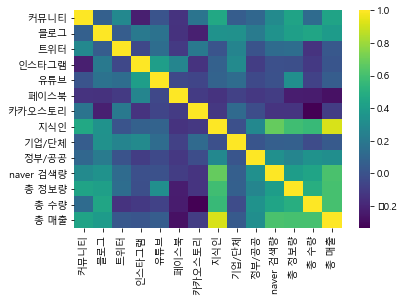

In [544]:
sns.heatmap(corr, cmap='viridis')
plt.show()

In [545]:
import matplotlib.pyplot as plt 
import matplotlib as mpl 
# %matplotlib inline 
import platform
from matplotlib import font_manager, rc # plt.rcParams['axes.unicode_minus'] = False 
if platform.system() == 'Darwin': rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': 
    path = "c:/Windows/Fonts/malgun.ttf" 
    font_name = font_manager.FontProperties(fname=path).get_name() 
    rc('font', family=font_name) 
else: 
    print('Unknown system... sorry~~~~')


In [547]:
corr.to_csv("./corr_heat.csv")